**Structure of iris dataset:**

* Number of samples: 150
* Number of features: 4
* Number of classes: 3 (Setosa, Versicolor, Virginica)
* Target: A label indicating the class (species) to which the flower belongs.

**Each sample consists of four features (attributes) related to the physical characteristics of the flowers:**
1.   Sepal length
2.   Sepal width
3.   Petal length
4.   Petal width

**Target (output variable): The species of the flower**

0: Setosa
1: Versicolor
2: Virginica



| Attribute Name         | Description                                      | Data Type | Range                     |
|------------------------|--------------------------------------------------|-----------|---------------------------|
| **sepal length (cm)**  | Length of the sepal (the outer part of the flower) | Float     | 4.3 to 7.9                |
| **sepal width (cm)**   | Width of the sepal                              | Float     | 2.0 to 4.4                |
| **petal length (cm)**  | Length of the petal                            | Float     | 1.0 to 6.9                |
| **petal width (cm)**   | Width of the petal                             | Float     | 0.1 to 2.5                |
| **flower**             | Species of the flower                          | Categorical | Setosa, Versicolor, Virginica |




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
irisdata = iris['data']
target = iris['target']
flower_names = iris['target_names']
feature_names = iris['feature_names']

df = pd.DataFrame(irisdata, columns=feature_names)
df['flower'] = target

flower_grouped = df.groupby('flower')

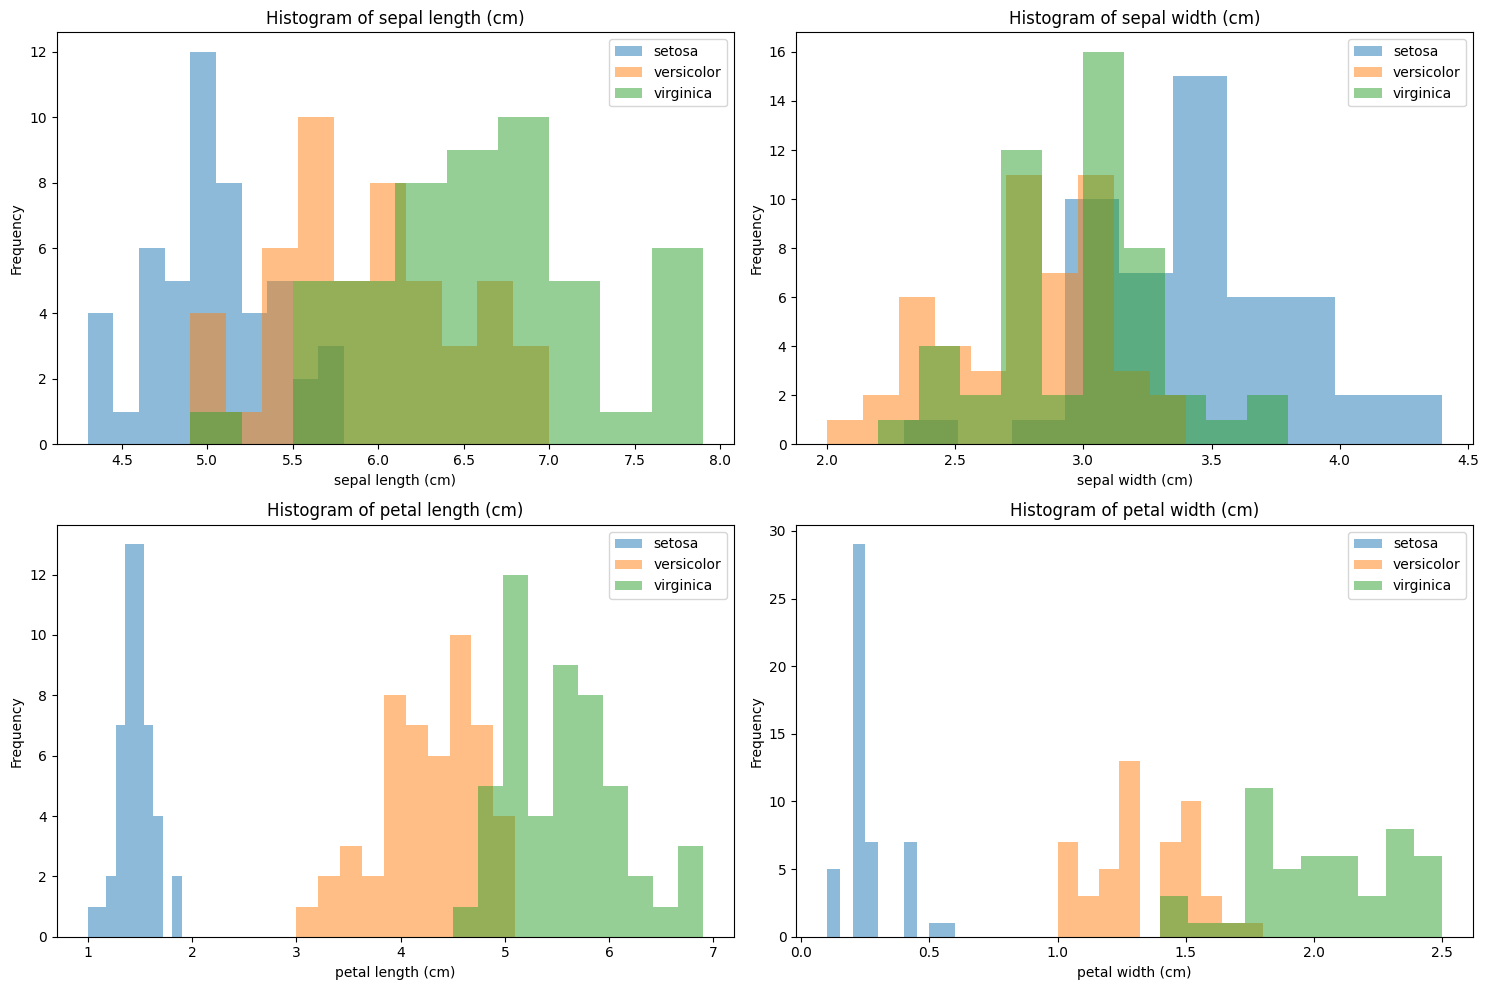

In [ ]:
# Plot the histogram for each class.
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_names): # iterate over each feature
    plt.subplot(2, 2, i + 1)
    for flower_index, flower_name in enumerate(flower_names): #iterate over each
        subset = flower_grouped.get_group(flower_index)
        plt.hist(subset[feature], alpha=0.5, label=flower_name)

    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

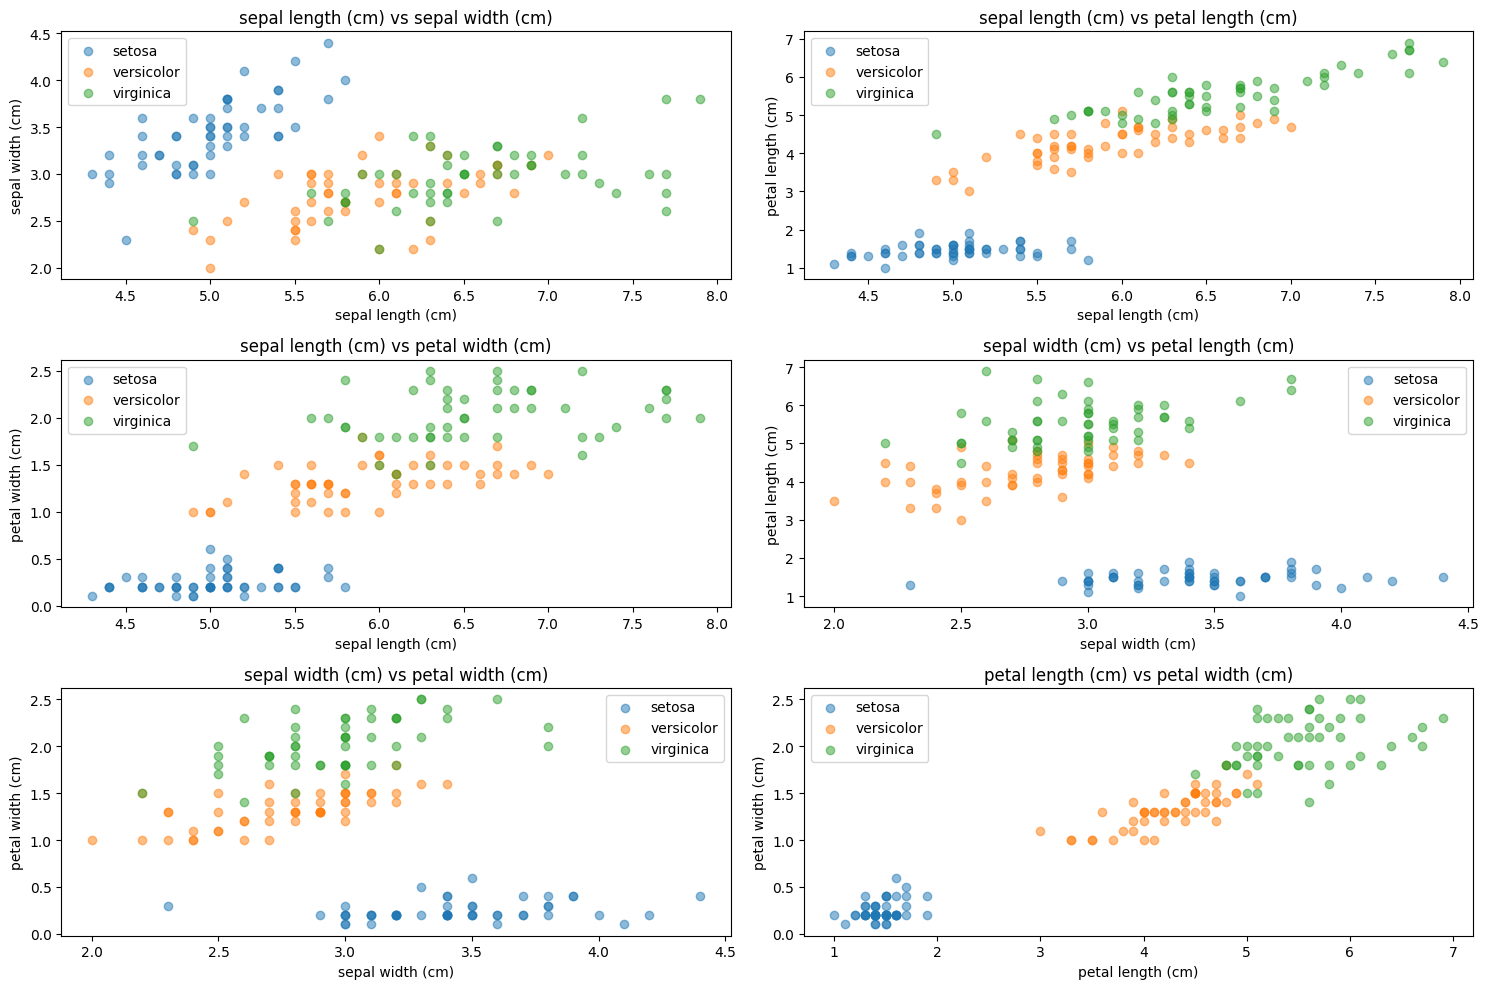

In [ ]:
# Use scatter plot to plot every 2 attributes together.
import itertools

# 4C2 from features = 6
combinations = list(itertools.combinations(feature_names, 2))

plt.figure(figsize=(15, 10))

for i, (feature1, feature2) in enumerate(combinations):
    plt.subplot(3, 2, i + 1)
    for flower_index, flower_name in enumerate(flower_names):
        subset = flower_grouped.get_group(flower_index)
        plt.scatter(subset[feature1], subset[feature2], label=flower_name, alpha=0.5)

    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()

plt.tight_layout()
plt.show()

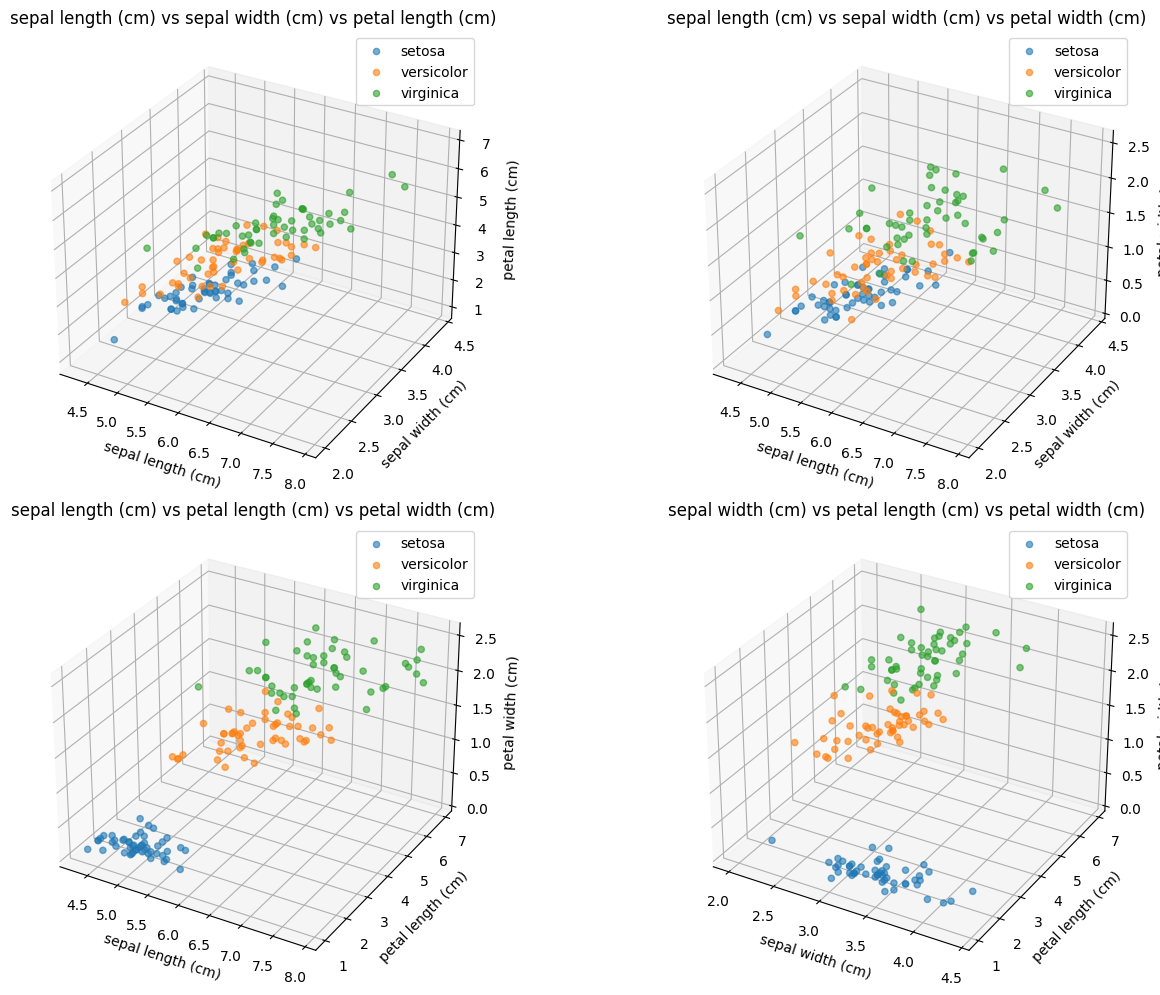

In [ ]:
# Use 3D scatter plot to plot every 3 attributes together.

# 4C3 from features = 4
combinations_3d = list(itertools.combinations(feature_names, 3))

fig = plt.figure(figsize=(15, 10))

for i, (feature1, feature2, feature3) in enumerate(combinations_3d):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    for flower_index, flower_name in enumerate(flower_names):
        subset = flower_grouped.get_group(flower_index)
        ax.scatter(subset[feature1], subset[feature2], subset[feature3], label=flower_name, alpha=0.6)

    ax.set_title(f'{feature1} vs {feature2} vs {feature3}')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    ax.legend()

plt.tight_layout()
plt.show()

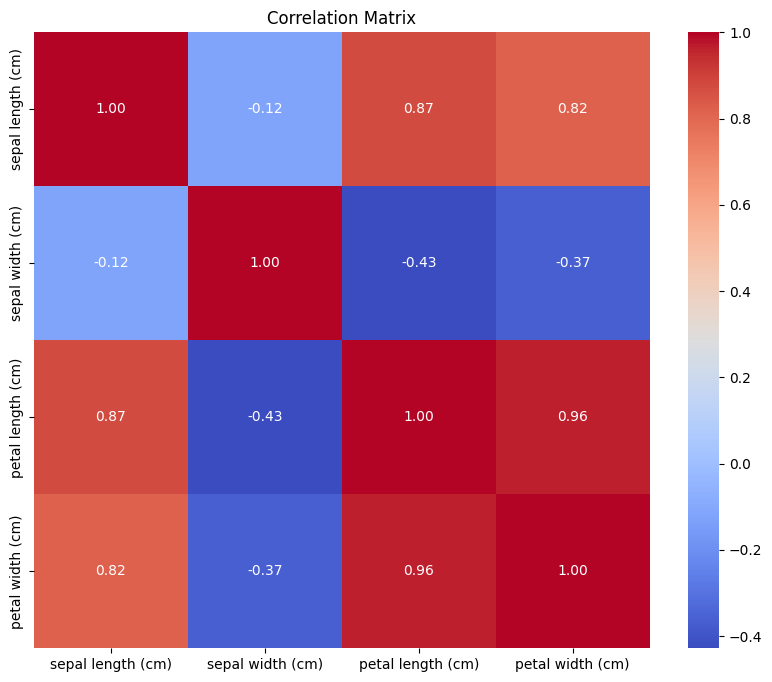

In [ ]:
# Show the correlation matrix between the attributes and comment on it.
import seaborn as sns

correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.drop(columns=['flower'], index=['flower'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

* The diagonal elements shows the corelation of each feature with itself - always = 1
* Symmetrical matric as the corelation between feature 1 iand 2 is the same as the corelation between feature 2 and 1.

**Positive Corelations:**
* Petal width with Petal length is 0.96 showing that as any of the Petal width or length increases the other tends to increase.
* There are also Petal length with Sepal length, 0.87, which is high indicating a positive relation.
* Petal width with Sepal length, 0.82.

**Negative Correlation:**
* Sepal width with Petal length is -0.43 showing that as any of the Sepal width or length decreases the other tends to decrease.
* Petal width with Sepal width, -0.37.

**Weak Correlation:**
Sepal Width with Sepal length is -0.12 which is weak indicating there is hardly any dependency.



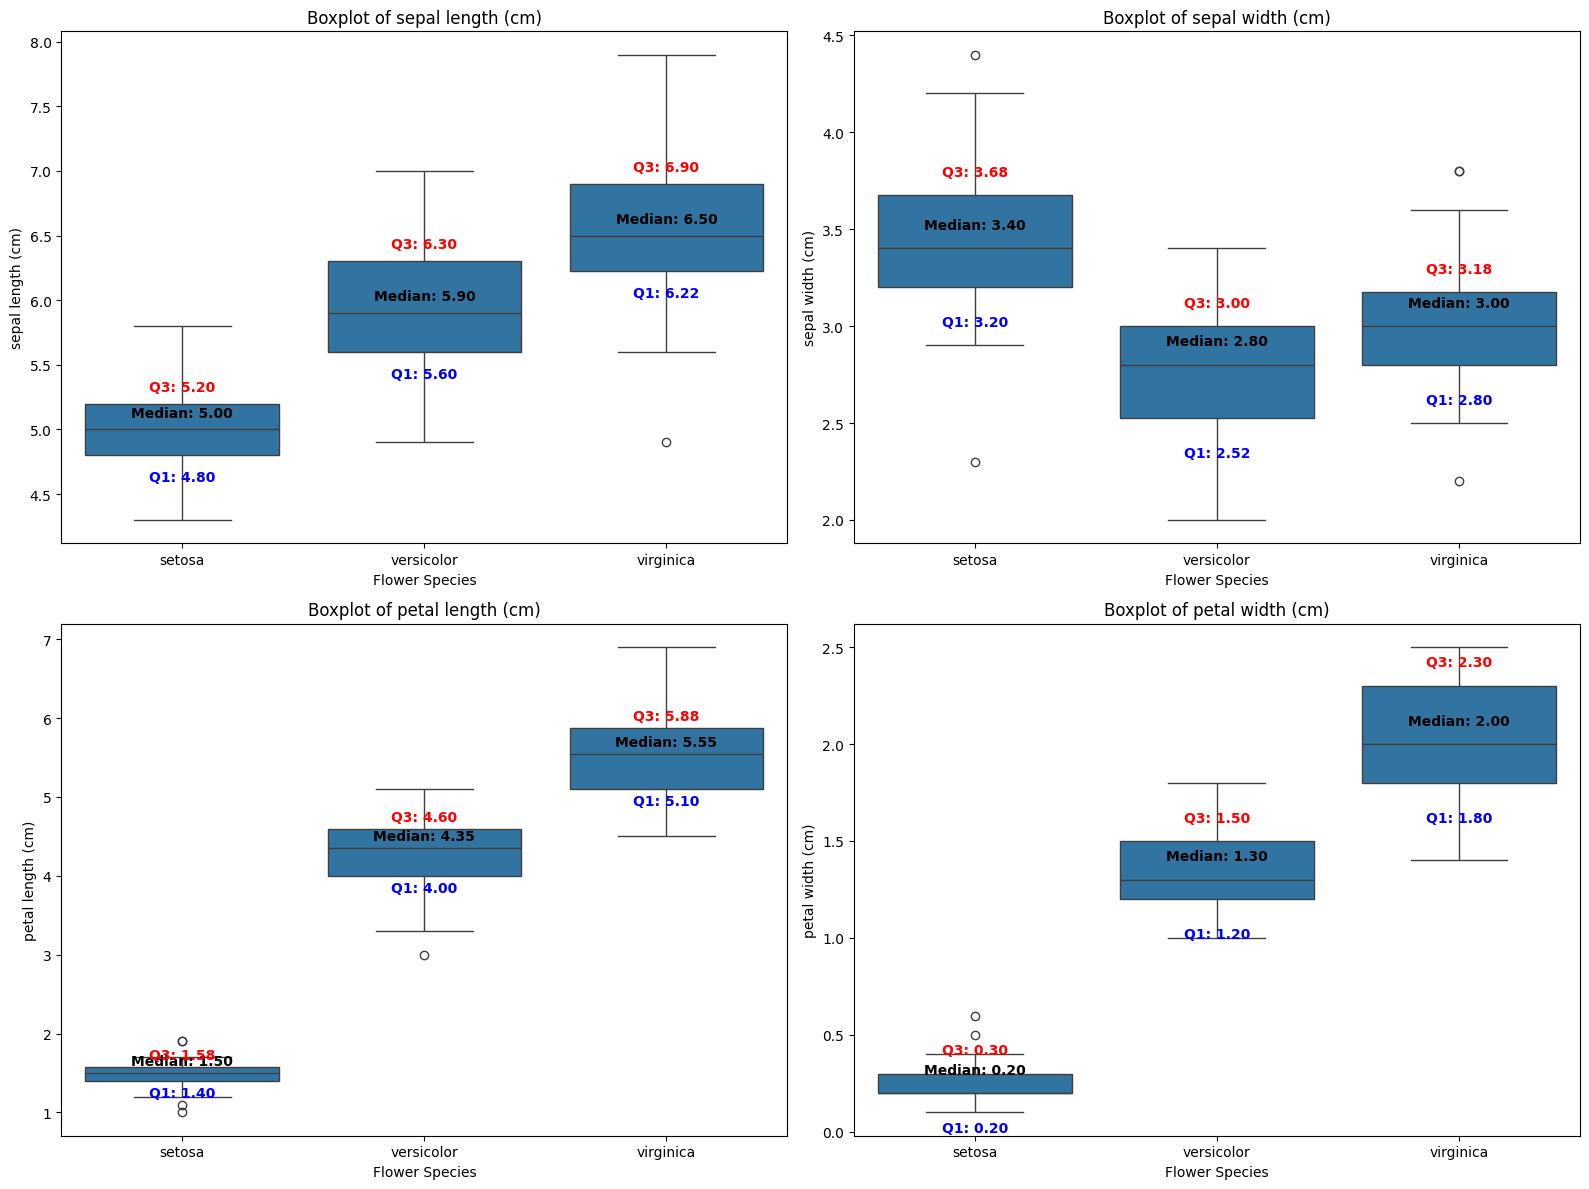

In [ ]:
# Use boxplots to show the quartiles and the median of the sepal length, sepal width, petal length and petal width for each kind of flowers.
df['flower'] = [flower_names[i] for i in target]

plt.figure(figsize=(16, 12))


for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    ax = sns.boxplot(x='flower', y=feature, data=df) # boxplot

    # Annotate median and quartiles
    for flower in df['flower'].unique():
        # Get the quartiles and median
        quartiles = df[df['flower'] == flower][feature].quantile([0.25, 0.5, 0.75])
        median = quartiles[0.5]
        q1 = quartiles[0.25]
        q3 = quartiles[0.75]

        # Calculate x position for the boxplot
        x_position = list(df['flower'].unique()).index(flower)

        # Add text annotations
        ax.text(x=x_position, y=median + 0.1, s=f'Median: {median:.2f}',
                horizontalalignment='center', color='black', weight='bold')
        ax.text(x=x_position, y=q1 - 0.2, s=f'Q1: {q1:.2f}',
                horizontalalignment='center', color='blue', weight='bold')
        ax.text(x=x_position, y=q3 + 0.1, s=f'Q3: {q3:.2f}',
                horizontalalignment='center', color='red', weight='bold')

    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Flower Species')
    plt.ylabel(feature)

# Adjust the layout
plt.tight_layout()
plt.show()